In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
import sys

In [3]:
'geopandas' in sys.modules

True

# Nashville Park Boundaries


In [4]:
parks = gpd.read_file('../data/parks.geojson')
print(parks.crs)
parks.head( )

EPSG:4326


,OBJECTID,Name,PARK_ID,Latitude,Longitude,YearEstablished,Acres,DaysOpen,Hours,Phone,...,FootballMultipurpose,CanoeLaunch,CommunityGarden,CommonName,Classification,City,State,ZipCode,GlobalID,geometry
0,142220,Harpeth River Park,PARK_169,36.077382,-86.959221,1988,69.860000,Daily,Dawn to 11 pm,(615) 797-6096,...,Yes,Yes,No,Harpeth River Park,Specialty,Nashville,TN,37221,dc4f081c-31e8-41e0-8d56-b981900a44f6,"POLYGON ((-86.95547 36.07931, -86.95578 36.079..."
1,142221,Harpeth Knoll Park,PARK_44,36.059428,-86.938155,1972,9.880000,Daily,Dawn to 11 pm,(615) 862-8400,...,No,No,No,Harpeth Knoll Park,Neighborhood,Nashville,TN,37221,091033af-10f8-433c-876b-c789dee970fc,"POLYGON ((-86.93860 36.06078, -86.93743 36.060..."
2,142222,Bellevue Park,PARK_49,36.071597,-86.933545,1982,17.140000,Daily,Dawn to 11 pm,(615) 862-8400,...,No,No,No,Red Caboose Park,Neighborhood,Nashville,TN,37221,506a7c23-64a3-4e9a-b9d8-be4b4e1006db,"POLYGON ((-86.93208 36.06955, -86.93283 36.068..."
3,142223,Bells Bend Park,PARK_50,36.150169,-86.926463,2007,809.590000,"Daily, Center: Tuesday -Saturday",Dawn to Dusk,(615) 862-4187,...,No,No,No,Bells Bend Park,Regional,Nashville,TN,37218,5bf61379-8a08-47cd-bb13-4c06655a8d11,"POLYGON ((-86.93988 36.16093, -86.93496 36.160..."
4,142224,Alvin G. Beaman Park,PARK_88,36.260758,-86.919842,1996,2170.892186,"Daily, Center: Tuesday -Saturday",Dawn to 11 pm,(615) 299-9586,...,No,No,No,Beaman Park,Regional,Joelton,TN,37080,62a069cc-8f0f-4f70-b8c8-789620680298,"MULTIPOLYGON (((-86.90368 36.27353, -86.90364 ..."


In [5]:
type(parks)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


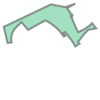

In [6]:
parks.loc[0, 'geometry']

#### ...and printing it


In [7]:
print(parks.loc[0, 'geometry'])

POLYGON ((-86.9554703265039 36.0793082680173, -86.9557827676139 36.0791459056105, -86.955546734077 36.078823609384, -86.9555551036675 36.0787701750712, -86.9554763980762 36.0787275417207, -86.9553275628288 36.0785242551368, -86.9552912604656 36.0784605340348, -86.9552583563239 36.0783978837825, -86.9552443122255 36.0783556860772, -86.9552348495381 36.0783285669278, -86.9552263949255 36.0783008872912, -86.9552192936363 36.078273196931, -86.9552135423641 36.0782452209761, -86.9552091444234 36.0782172351991, -86.9552060975962 36.0781889629178, -86.9552044040977 36.0781606808147, -86.9552040639046 36.0781323870875, -86.9552050770372 36.0781040835387, -86.9552074434725 36.0780757683658, -86.9552108290398 36.0780477209165, -86.9552159065128 36.0780196591601, -86.9550137723422 36.0781803226109, -86.9550137261312 36.0781802652936, -86.9550031461108 36.0781678840779, -86.9549767022125 36.0781369336898, -86.9550084596939 36.0780400335489, -86.9550651683496 36.0778670117274, -86.9550410540564 36.

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


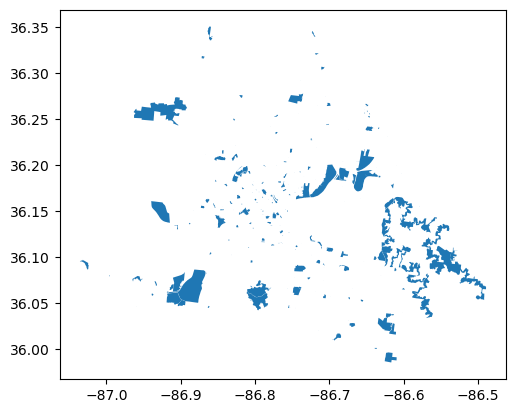

In [8]:
parks.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


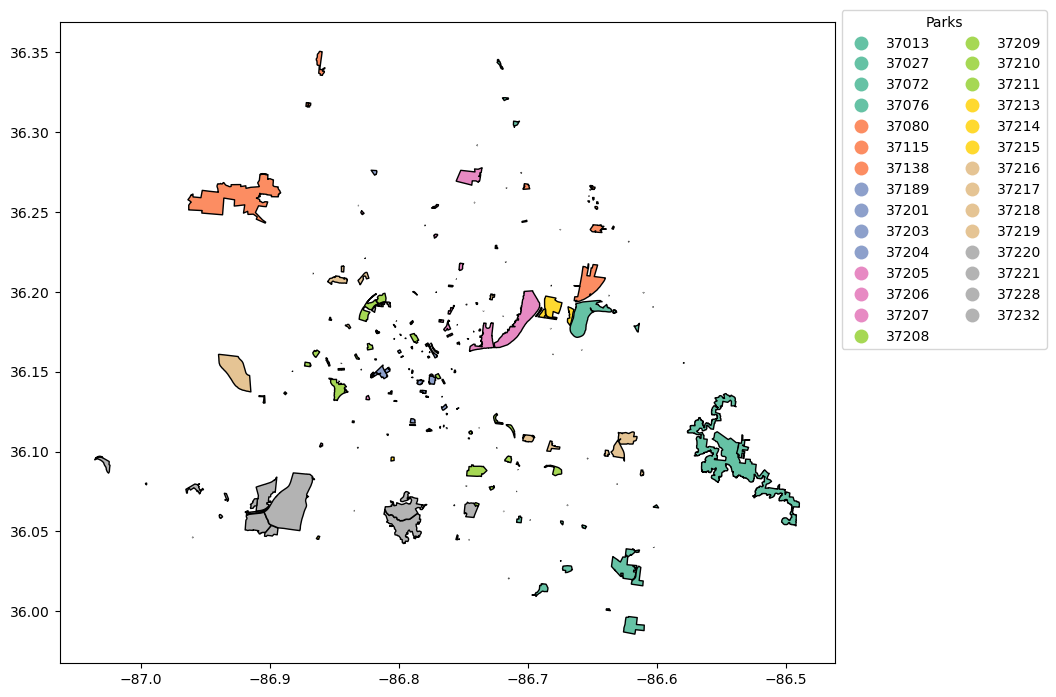

In [9]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'ZipCode', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

# Public Art Locations


In [10]:
public_art = gpd.read_file('../data/art.geojson')
print(public_art.crs)
public_art.head( )

EPSG:4326


,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,TN,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,TN,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,TN,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,TN,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489)


In [11]:
type(public_art)

geopandas.geodataframe.GeoDataFrame

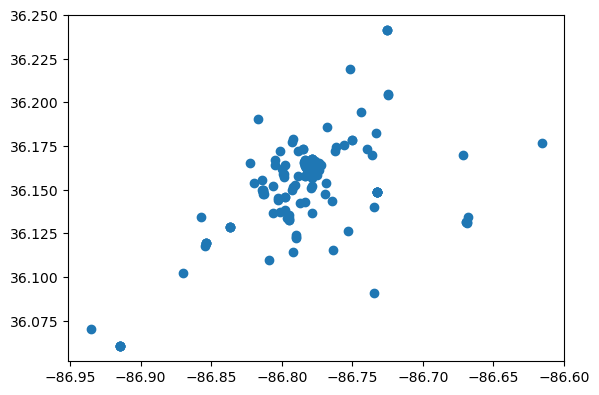

In [12]:
public_art.plot();

In [13]:
# Joining Dataframes

In [14]:
parks.head(1)

,OBJECTID,Name,PARK_ID,Latitude,Longitude,YearEstablished,Acres,DaysOpen,Hours,Phone,...,FootballMultipurpose,CanoeLaunch,CommunityGarden,CommonName,Classification,City,State,ZipCode,GlobalID,geometry
0,142220,Harpeth River Park,PARK_169,36.077382,-86.959221,1988,69.86,Daily,Dawn to 11 pm,(615) 797-6096,...,Yes,Yes,No,Harpeth River Park,Specialty,Nashville,TN,37221,dc4f081c-31e8-41e0-8d56-b981900a44f6,"POLYGON ((-86.95547 36.07931, -86.95578 36.079..."


In [16]:
parks2 = parks[['Name', 'geometry']]

In [17]:
public_art.head(1)

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.1624,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)


In [18]:
art_in_parks = gpd.sjoin(public_art, parks2, predicate = 'within')

In [19]:
art_in_parks.head()

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry,index_right,Name
5,Piecing It All Together,Cooper,Michael,600 Church Street,Painting on Stone,Mural,None,36.16281,-86.78186,Nashville,TN,37219,a0aa9c08-31e9-4545-b34e-bf9b1f574e06,6,POINT (-86.78186 36.16281),45,Church Street Park
16,Ariel,Emery,Lin,2500 West End Avenue,Sculpture: bronze with brown patina; \nBase: c...,Mobile,A five piece mobile of crescent-shaped forms. ...,36.14764,-86.81311,Nashville,TN,37203,6f06ed32-12ea-4237-aaca-81fc97620ca9,17,POINT (-86.81311 36.14764),28,Centennial Park
25,Athena Parthenos,LeQuire,Alan,2500 West End Ave,Gypsum cement reinforced with fiberglass over ...,Sculpture,"Athena Parthenos with shield and spear, holdin...",36.14986,-86.81346,Nashville,TN,37203,9c4213da-598b-4f95-9196-bcdcce18063b,26,POINT (-86.81346 36.14986),28,Centennial Park
32,Confederate Private Monument,Zolnay,George Julian,2500 West End Avenue,Bronze on a limestone and granite base,Sculpture,"The Confederate Private Monument, sometimes ca...",36.14788,-86.81261,Nashville,TN,37203,fce25b30-c8f4-48b1-a2b0-31a18daa81e9,33,POINT (-86.81261 36.14788),28,Centennial Park
38,Reach for the Stars,Shimmin and Stevenson and Vallett,Mimi and Doug Stevenson and Pam,"Easley Community Center at E.S. Rose Park, 100...",Painted tiles,Mural,Reach For The Stars is a colorful tile mosaic ...,36.14305,-86.78368,Nashville,TN,37203,6cb63458-afff-4928-bde2-ed7fd3fc7389,39,POINT (-86.78368 36.14305),44,E. S. Rose Park


In [20]:
type(art_in_parks)

geopandas.geodataframe.GeoDataFrame

In [21]:
art_in_parks['ZipCode'].value_counts()

ZipCode
37203    9
37213    2
37201    2
37219    1
37210    1
37212    1
37208    1
37076    1
37209    1
Name: count, dtype: int64

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [24]:
art37203 = art_in_parks.loc[art_in_parks['ZipCode'] == '37203']
art37203.shape

(9, 17)

In [22]:
polygon37203 = parks.loc[parks['ZipCode'] == '37203']
polygon37203.shape

(12, 54)

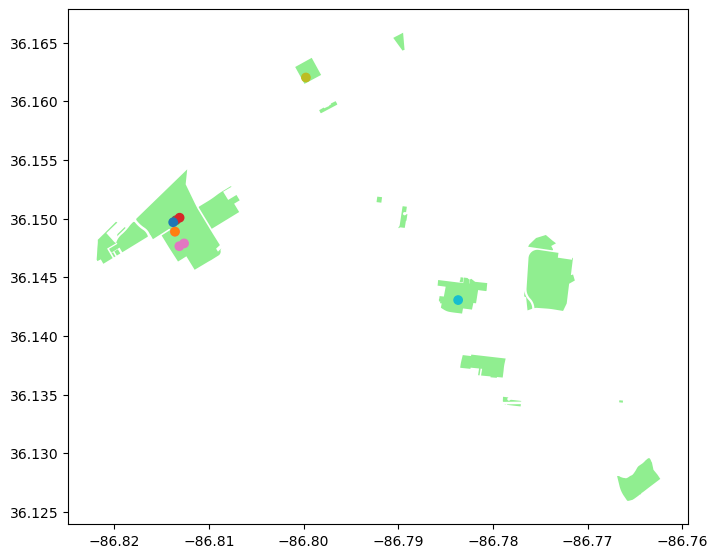

In [25]:
#fig, ax = matplotlib.subplots()
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
art37203.plot( ax = ax, column = 'Address');
plt.show();

In [26]:
polygon37203.geometry.centroid

C:\Users\erica\AppData\Local\Temp\ipykernel_8180\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


28     POINT (-86.81341 36.14941)
34     POINT (-86.79951 36.16258)
35     POINT (-86.79737 36.15948)
37     POINT (-86.79200 36.15161)
40     POINT (-86.78946 36.15004)
44     POINT (-86.78345 36.14351)
46     POINT (-86.78087 36.13751)
47     POINT (-86.77810 36.13439)
52     POINT (-86.77421 36.14503)
164    POINT (-86.76648 36.13441)
185    POINT (-86.76463 36.12764)
197    POINT (-86.78979 36.16512)
dtype: geometry

In [27]:
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.7973687814848 36.15947566115025)


C:\Users\erica\AppData\Local\Temp\ipykernel_8180\4090195936.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [28]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.15947566115025, -86.7973687814848]


In [50]:

map_art_in_parks = folium.Map(location =  area_center, zoom_start = 12)
map_art_in_parks

In [30]:
i = 0
for row_index, row_values in art37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 16
values are:
 
Title                                                           Ariel
ArtistLastName                                                  Emery
ArtistFirstName                                                   Lin
Address                                          2500 West End Avenue
Medium              Sculpture: bronze with brown patina; \nBase: c...
InstallationType                                               Mobile
Description         A five piece mobile of crescent-shaped forms. ...
Latitude                                                     36.14764
Longitude                                                   -86.81311
City                                                        Nashville
State                                                              TN
ZipCode                                                         37203
GlobalID                         6f06ed32-12ea-4237-aaca-81fc97620ca9
OBJECTID                                                        

In [32]:
art37203.head(1)

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry,index_right,Name
16,Ariel,Emery,Lin,2500 West End Avenue,Sculpture: bronze with brown patina; \nBase: c...,Mobile,A five piece mobile of crescent-shaped forms. ...,36.14764,-86.81311,Nashville,TN,37203,6f06ed32-12ea-4237-aaca-81fc97620ca9,17,POINT (-86.81311 36.14764),28,Centennial Park


In [49]:
# Map showing Public Art in Nashville area Parks
map_art_in_parks = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_art_in_parks)



for row_index, row_values in art37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title'])
    icon=folium.Icon(color="blue",icon="fa-paint-brush", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_art_in_parks)
map_art_in_parks.save(r'C:\Users\erica\OneDrive\Documents\Data Analytics Notes & Slides\maps\map_art_in_parks.html')

#display our map
map_art_in_parks

#### You can save your map as an html file and it will retain the interactive qualities

In [46]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb